# Homework 2 solutions

# Question 1. 
Write a Python script that reads in all lines of the data file and stores the values of the “TimeStamp [ms]” column in an array. The TimeStamp column is the 4th column in the data rows.

In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon June 27 2022
@author: rolandg
"""

from datetime import datetime
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm
import os
import sys

#Function to read data from file "fname"
#Function will read until end of file

def read_data(fname):

    print("Preparing to read data from ",fname)

    #Check if file exists
    flag = os.path.exists(fname)   
    if flag : 
        print(fname, "found")
    else:
        print(fname, "does not exist")
        sys.exit()


    print("Open ", fname)            
    f = open(fname,"r")

    # read and discard header lines
    print("Read seven line CosmicWatch file header")
    for i in range(7):
        s = f.readline()
        
    print("Read data")
    ts    = []
    SiPM  = []
    Coinc = []
#the while loop will run until the end of file or i == nevent
    flag = True
    i = 0
    while flag:
        s = f.readline()
        if s:
            ss = s.split()
            if(int(ss[0]) == (i+1) and len(ss) > 10):
#Extract the timestamp information, SiPM voltage and coincidence flag from the input line
                ts.append(float(ss[3]))
                SiPM.append(float(ss[6]))
                Coinc.append(float(ss[10]))
                i = i + 1
            else:
                print("Huh:",int(ss[0]),i+1)
        else:
            # reached end of file; stop while loop
            flag = False
        
    print("Total events read from ",filename, "= ",i)
    f.close()
    return ts,SiPM,Coinc
# end of read_data()


now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("******************************************")
print("Starting at",dt_string)
print("\n")
filename = "../Data/TopRight_20230803.txt"
print("Reading sensor data from",filename)
ts1, SiPM,Coinc = read_data(filename)


******************************************
Starting at 23/03/2024 15:54:07


Reading sensor data from ../Data/TopRight_20230803.txt
Preparing to read data from  ../Data/TopRight_20230803.txt
../Data/TopRight_20230803.txt found
Open  ../Data/TopRight_20230803.txt
Read seven line CosmicWatch file header
Read data
Total events read from  ../Data/TopRight_20230803.txt =  763301


# Question 2. 

How many elements does the array have (this is the number of signal events in the data file)?

In [11]:
N_total = len(ts1)
print("Answer to question 2:")
print(f"File contains {N_total} signal events")

Answer to question 2:
File contains 763301 signal events


# Question 3.
Fill the TimeStamp values into a 1 dimensional histogram with 100 bins. What is the shape of the distribution you see?

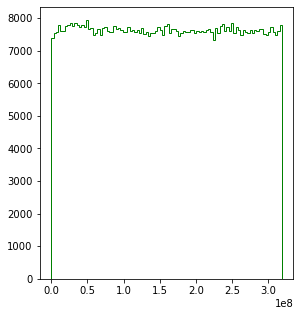

In [6]:
plt.figure(figsize=(10,5))      
nbins =100

plt.subplot(121)
counts1, edges1, xxx = plt.hist(ts1,nbins, histtype='step',color='g')


Answer to question 3: The distribution is approximately uniform (flat)

# Question 4:

The TimeStamp value, measured in milli-seconds, indicates when after t = 0s each signal event occurred. The value of the last TimeStamp gives the total durationover which data were collected. Approximately, what is the rate of signal events per second?

In [14]:
t_last = ts1[-1]
t_first = ts1[0]
#calculate total time and convert from milliseconds to seconds
t_total = (t_last - t_first)/1000.0
print(f"Data were taken from {t_first}ms to {t_last}ms ")
print(f"Total data taking time was {t_total} seconds")

rate = N_total/t_total

print("Anser to question 4:")
print(f"The rate of events was {rate:.4} events per second" )

Data were taken from 609.0ms to 318579019.0ms 
Total data taking time was 318578.41 seconds
Anser to question 4:
The rate of events was 2.396 events per second


# Question 5:

What is the relative statistical uncertainty on the average rate of signal events per second, based on the TimeStamp information?


In [32]:
print("Answer to question 5:")
print(f"This is a counting experiment with {N_total} independent events in time interval {t_total}s")
print(f"We can think of this as one trial drawing from a Poisson distribution with mean {N_total}"
)
print(f"The standard deviation of this Poisson distribution is sqrt(mean) = {np.sqrt(N_total):.3f}")
print(f"The absolute uncertainty on the mean is given by sigma = std dev/sqrt(# of trials")
print(f"In this case sigma = {np.sqrt(N_total):.3f}/1")
print(f"The relative uncertainty is therefore sigma/N = {np.sqrt(N_total)/N_total:.3} or {np.sqrt(N_total)/N_total*100:.1}%")

Answer to question 5:
This is a counting experiment with 763301 independent events in time interval 318578.41s
We can think of this as one trial drawing from a Poisson distribution with mean 763301
The standard deviation of this Poisson distribution is sqrt(mean) = 873.671
The absolute uncertainty on the mean is given by sigma = std dev/sqrt(# of trials
In this case sigma = 873.671/1
The relative uncertainty is therefore sigma/N = 0.00114 or 0.1%
